<a href="https://colab.research.google.com/github/siddharthakasireddy/tech/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project on Motor Damage


In [ ]:
import numpy as np
import cv2
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn;sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

basic python libraries are imported to work on the project with a particular dataset about the motor damage.

In [ ]:
class_names = ['Normal', 'Damage']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150,150)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data():
  datasets= ['/content/drive/MyDrive/MOTOR damage detection/MOTOR dataset','/content/drive/MyDrive/MOTOR damage detection/MOTOR dataset']

  output = []

  for dataset in datasets:

    images = []

    labels = []

    print("Loading ()".format(dataset))
    for folder in os.listdir(dataset):

      label= class_names_label [folder]

      for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path=os.path.join(os.path.join(dataset, folder), file)

        image=cv2.imread(img_path)

        image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image= cv2.resize(image, IMAGE_SIZE)

        images.append(image)
        labels.append(label)

    images= np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype ='int32')
    output.append((images, labels))
  return output

In [ ]:
(train_images, train_labels), (test_images,test_labels) = load_data()

Loading ()


100%|██████████| 53/53 [00:00<00:00, 105.61it/s]


Loading ()


100%|██████████| 53/53 [00:00<00:00, 115.43it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 105
Number of testing examples: 105
Each image is of size: (150, 150)


In [ ]:
train_images=train_images /255.0
test_images=test_images   /255.0

In [ ]:
def display_examples (class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names [labels[i]])
plt.show()

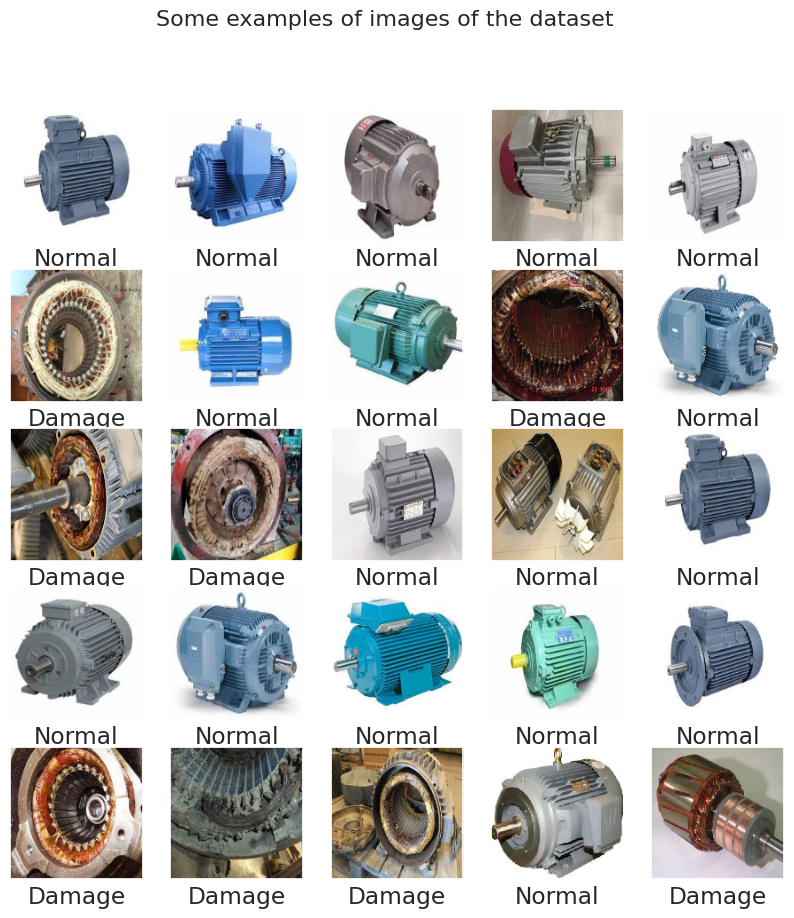

In [ ]:
display_examples (class_names, train_images, train_labels)

In [ ]:
model = tf.keras. Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers. Conv2D (32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers. Dense (128, activation=tf.nn.relu),
    tf.keras.layers. Dense (5, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 110.0497 - accuracy: 0.0357 - val_loss: 6.0514 - val_accuracy: 0.8571
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 4.5484 - accuracy: 0.9167 - val_loss: 694.2059 - val_accuracy: 0.4286
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 572.1803 - accuracy: 0.5238 - val_loss: 129.3612 - val_accuracy: 0.5714
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 141.8456 - accuracy: 0.4762 - val_loss: 80.1628 - val_accuracy: 0.6190
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 60.8123 - accuracy: 0.6786 - val_loss: 23.8680 - val_accuracy: 0.8095
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 15.0678 - accuracy: 0.8571 - val_loss: 21.4188 - val_accuracy: 0.9048
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 10.8637 - accuracy: 0.9524 - val_loss: 56.2188 - val_accuracy: 0.7143
Epoch 8/30
1/1 [========

The project is about motor damage in which we imported packages, imported dataset , trained it, tested it, evaluated the model and predicted it
